https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [1]:
%config Completer.use_jedi = False

# 신용카드 사기 판별기

여기서는 우리가 배우고싶어했던 smote 방법을 사용하고 있으며 여러가지 scale 방식들, t-sne를 통한 군집화 등 잘 알려진 중요한 개념들을 사용하여 데이터를 분석하고 있다. 잘 따라가보자.



In [2]:
# package load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 원문에서는 이것 외에도 여러가지 다른 패키지들을 한번에 불러왔지만
# 나는 익숙하지 않는 패키지들을 익혀야하므로 그때그때 불러오면서 익혀보도록 하겠다.

## 데이터 읽어오기

In [3]:
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

null value 가 없는 아름답고 훌륭한 데이터다...
또 Time과 Amount를 빼면 모든 값은 설명된 대로 PCA로 분석되어 있는 float 형태이므로 Time과 Amount도 비슷한 처리를 해줄 필요가 있어 보인다.

In [7]:
print("No Frauds rate ::: {0:.2f}%".format(df["Class"].mean() * 100))
print("Frauds rate    ::: {0:.2f}%".format((1-df["Class"].mean()) * 100))

No Frauds rate ::: 0.17%
Frauds rate    ::: 99.83%


굉장히 No Fraud 에 치우친 모습을 볼 수 있다. 이런 경우에는 반드시 balancing작업을 해줘야 한다.

<AxesSubplot:xlabel='Class', ylabel='count'>

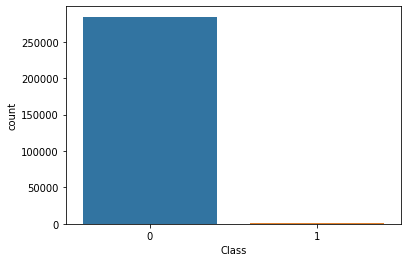

In [8]:
sns.countplot(
    data = df,
    x = "Class"
)

하나 배웠다. countplot 이라는거 계속 찾았는데 못찾아서 count 해준 후에 그리거나 hist로 그려서 마음대로 보기 어려웠는데 유용하게 써먹어야겠다.
아무튼 잘 보면 아주 얇게 1이 있다. 시각적으로 보아도 데이터의 불균형이 굉장히 심하다.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


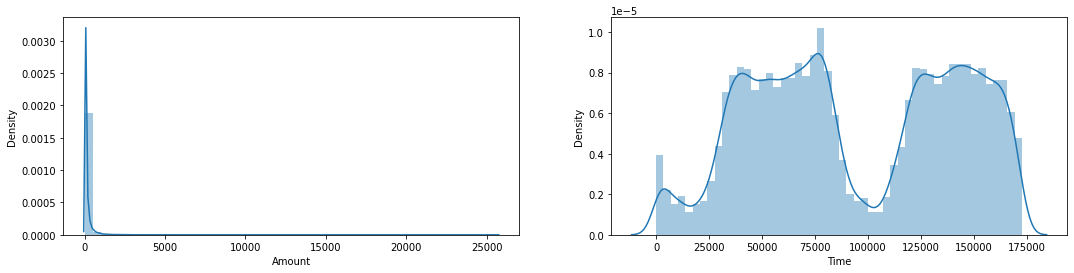

In [9]:
fig, ax = plt.subplots(1,2,figsize = (18,4))
sns.distplot(
    a = df["Amount"],
    ax = ax[0]
)
sns.distplot(
    a = df["Time"],
    ax = ax[1]
)
plt.show()

distplot 이란걸 썼는데 그냥 hist랑 kde 를 쓰는게 더 빠를것 같다. 익숙해지면 좋겠지만 지금은 더 느리다. 아무튼 Amount 데이터의 분포는 굉장히 0에 가깝게 편향되어있는 반면 Time 의 분포는 multimodal하게 분포하지만 대체로 균등하게 퍼져있는 것을 알 수 있다. 따라서 둘을 scaling 할때는 서로 다른 전략을 취해주는 것이 좋겠다.

## Scaling and Distributing

굉장히 편향된 데이터 이므로 모델이 정상적인 학습을 할 수 없을것이라는 것은 자명하다. 이제 이 데이터를 scaling 하고 subsampling 하여서 Class 에 따른 분포를 확인하고 구분 가능한 정도로 분포를 얻을 수 있는지 확인해보자.

In [10]:
from sklearn.preprocessing import StandardScaler,RobustScaler

In [11]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

전처리를 위해 스케일링을 한다. 여기서 outlier 데이터가 존재할 경우, 즉 Amount 와 같은 데이터의 경우 RobustScaler를 사용해준다. 

In [12]:
df["_scaled_Amount"] = std_scaler.fit_transform(df[["Amount"]])
df["scaled_Amount"] = rob_scaler.fit_transform(df[["Amount"]])

df["scaled_Time"]   = std_scaler.fit_transform(df[["Time"]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

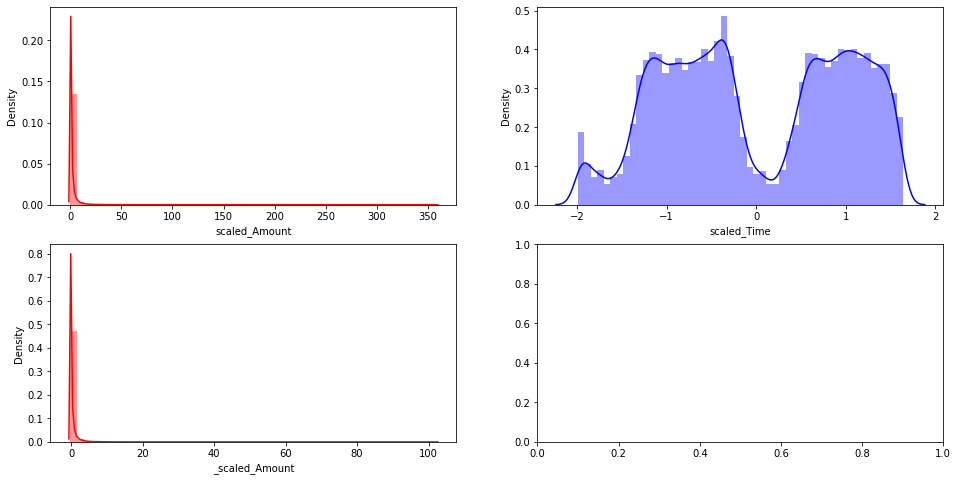

In [13]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
sns.distplot(
    a = df.scaled_Amount,
    ax = ax[0,0],
    color = 'r'
)
sns.distplot(
    a = df.scaled_Time,
    ax = ax[0,1],
    color = 'b'
)
sns.distplot(
    a = df._scaled_Amount,
    ax = ax[1,0],
    color = 'r'
)

plt.show()

robustScaler 로 scaling 해준 데이터는 분산의 폭이 더 적게 변한 것을 볼 수 있다. 자칫 outlier에 의해 분산값이 너무 크게 잡히게 되면 주요한 정보를 담고있는 데이터들이 과하게 축소되는 경향이 있으므로 그런것들을 방지하기위해서는 robustScaler를 써주도록 하자. 이제 필요없는 columns를 버린다.

In [14]:
df.drop(["Amount","Time","_scaled_Amount"], axis = 1, inplace = True)

In [15]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.641974


원래 있었던 곳으로 위치 바꿔주기

In [16]:
scaled_amount = df.scaled_Amount
scaled_time = df.scaled_Time

df = df.drop(["scaled_Amount","scaled_Time"], axis = 1)
df.insert(0, "scaled_Amount", scaled_amount)
df.insert(1, "scaled_scaled_Time", scaled_time)
df

,scaled_Amount,scaled_scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038986,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.641096,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.167680,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


insert는 따로 inplace 지정하지 않아도 바로바로 되는 모양이다. 이렇게 feature 정리를 끝낸 후 5:5로 데이터를 정리하는 작업을 거치는데 undersample 방식으로 Class == 0 에 해당하는 데이터들을 버려버린다. 이 부분에서 모델을 여러번 검사하는 방식으로 train과 rest를 나누는 방식을 소개하는데 나는 그냥 train_test_split을 사용해서 나누도록 하겠다. 그리고 subplot 도 간단하게 pd의 메소드를 이용해서 나누어주도록 한다.

# Undersampling

In [17]:
fraud = df[df["Class"] == 1]
no_fraud = df[df["Class"] == 0]

print(fraud.shape, no_fraud.shape)

(492, 31) (284315, 31)


In [18]:
no_fraud = no_fraud.sample(len(fraud))
no_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 9232 to 226562
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   scaled_Amount       492 non-null    float64
 1   scaled_scaled_Time  492 non-null    float64
 2   V1                  492 non-null    float64
 3   V2                  492 non-null    float64
 4   V3                  492 non-null    float64
 5   V4                  492 non-null    float64
 6   V5                  492 non-null    float64
 7   V6                  492 non-null    float64
 8   V7                  492 non-null    float64
 9   V8                  492 non-null    float64
 10  V9                  492 non-null    float64
 11  V10                 492 non-null    float64
 12  V11                 492 non-null    float64
 13  V12                 492 non-null    float64
 14  V13                 492 non-null    float64
 15  V14                 492 non-null    float64
 16  V1

In [19]:
undersample = pd.concat([fraud,no_fraud], axis = 0)
undersample

,scaled_Amount,scaled_scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.307413,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.084469,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.045204,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.517013,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.293440,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120441,-0.287012,-0.399740,-3.276723,2.802009,0.002695,-2.028004,-0.816300,-0.780616,0.203361,0.468559,...,1.342020,-0.567904,-0.357601,0.000489,-0.024737,0.154943,0.584190,-0.435045,-1.155967,0
217459,0.723818,0.970436,-0.579914,1.142524,-0.722849,-0.375098,0.625102,-0.579778,1.238312,0.190600,...,0.063354,0.136216,0.434259,-0.024324,0.624173,0.013480,-0.240091,0.258570,0.188929,0
207670,0.967512,0.883804,1.878908,-0.065586,-1.797559,0.598437,0.110445,-1.406976,0.384462,-0.400002,...,-0.026463,0.256009,0.728418,-0.092490,-0.069210,0.209968,-0.108089,-0.015001,-0.016137,0
78278,-0.083840,-0.786616,-1.056791,0.684325,0.941839,0.181479,-0.299044,-1.080919,-0.081099,0.652097,...,-0.002605,-0.140450,-0.794827,0.108534,0.417396,-0.278021,0.047913,0.103708,-0.042116,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


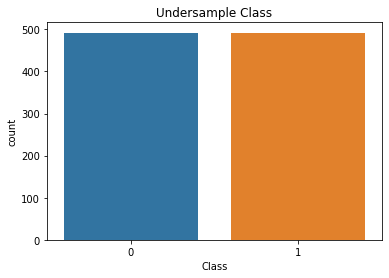

In [20]:
sns.countplot(
    undersample["Class"],
    x = "Class",
)
plt.title("Undersample Class")
plt.show()

비슷하게 맞춰졌다. 이제는 이 undersample data를 가지고 각 열들의 correlation을 살펴보도록 하자. correlation은 데이터의 feature를 이해하는데 가장 중요한 key로 이렇게 각 열이 무슨 의미를 지닌 수치인지 알 수 없는 경우에도 살펴볼 수 있다. correlation에 대한 이해는 다음과 같다.

- **Negative Correlation** : 음의 correlation은 서로 상반된 결과를 예측할 수 있다. 한쪽이 더 높은 수치를 보일수록 다른 한쪽은 더 낮은 수치를 보일 가능성이 높다. Class 1은 0보다 높은 수치이므로 음의 correlation을 가지는 차원은 그 값이 클 수록 사기가 아닐 확률이 높아진다.
- **Positie Correlation** : 양의 correlation은 그 반대다. 양의 correlation을 가지는 차원의 값이 높은 데이터일 수록 Class가 1에 가까울 확율이 높다. 따라서 사기거래일 확률또한 높아진다.

correlation을 한번에 그리고 heatmap으로 나타낸 다음 Class와 얼마나 그리고 어떻게 correlation을 가지는지 알아보도록 하자.

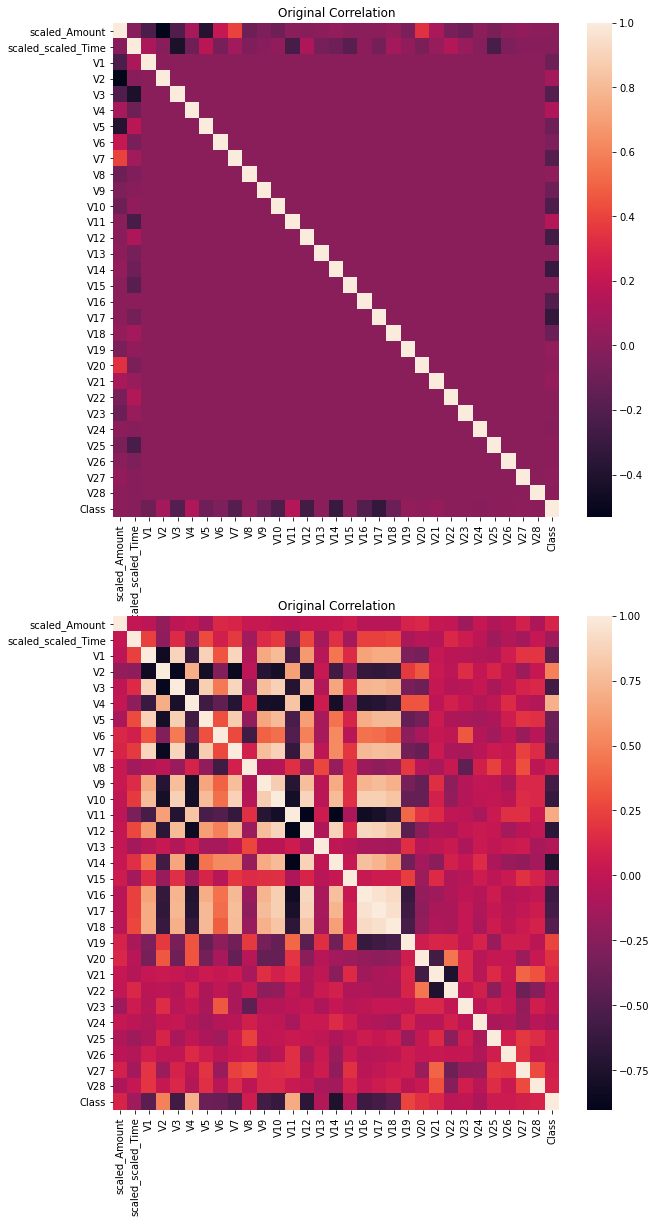

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (10,20))

original_corr = df.corr()
sns.heatmap(
    data = original_corr,
    ax = ax[0],
)
ax[0].set_title("Original Correlation")

undersample_corr = undersample.corr()
sns.heatmap(
    data = undersample_corr,
    ax = ax[1],
)
ax[1].set_title("Original Correlation")

plt.show()

원래의 데이터와 undersample데이터를 비교해보면 원데이터의 경우 Class를 제외한 축들간의 correlation은 거의 모두 0에 가깝고 그나마 Class와 correlation이 있는 데이터들이 있다. 하지만 그마저도 모두 negative correlation이라서 만ㅎ은 정보를 얻기가 힘들다. 하지만 undersample된 데이터를 보면 데이터간의 correlation도 다양하게 나타나는 반면 Class와의 correlation도 negative와 positive가 모두 나타나고 있음을 알 수 있다.

In [22]:
undersample_corr["Class"]

scaled_Amount         0.111952
scaled_scaled_Time   -0.141893
V1                   -0.444201
V2                    0.496078
V3                   -0.572663
V4                    0.717226
V5                   -0.378575
V6                   -0.388497
V7                   -0.476726
V8                    0.057752
V9                   -0.562417
V10                  -0.624350
V11                   0.683891
V12                  -0.680317
V13                  -0.064034
V14                  -0.747723
V15                  -0.064479
V16                  -0.600095
V17                  -0.560217
V18                  -0.475974
V19                   0.257737
V20                   0.178297
V21                   0.128113
V22                  -0.018851
V23                  -0.010426
V24                  -0.090118
V25                   0.048522
V26                   0.051983
V27                   0.083899
V28                   0.103396
Class                 1.000000
Name: Class, dtype: float64

## t-SNE plot

이제 여기에 정당성을 하나 더 부여해보자. 바로 t-SNE 라는 방식으로 데이터를 저차원표현해보는 것인데 t-SNE는 데이터를 무작위로 나열한 뒤 t분포 상에서 거리가 가까워지는 규칙으로 점들을 옮겨서 더 이상 옮겨지지 않는 상태까지 만든 것을 말한다. 이때 한 점이 특정 거리 이상을 움직이면 전체적인 거리의 손해가 발생할 수도 있기 때문에 그렇지 않은 경우만을 골라서 움직이는 것이다. 데이터를 undersample 하면 이렇게 최적화를 통해서 분포를 확인하는 방법도 빨르게 적용할 수 있다는 장점이 있다. 이제 t-SNE 와 PCA 등을 이용해서 저차원 표현을 그려보자.

In [23]:
undersample = undersample.sample(len(undersample))
undersample

,scaled_Amount,scaled_scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
213670,-0.198002,0.937775,-0.774829,1.309451,-0.159212,-1.002847,0.407701,-1.148201,0.975766,0.139601,...,-0.171688,-0.048230,-0.093215,-0.115190,-0.165634,-0.088738,-0.116917,0.096620,0.143962,0
118280,-0.282540,-0.416818,-1.341215,1.438861,1.252140,-0.807989,0.371764,-0.361484,0.984685,-0.504770,...,0.016709,-0.181574,-0.426407,-0.005004,0.134357,-0.492781,-0.302563,-1.657982,-0.890123,0
201601,1.512052,0.824294,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,...,0.621804,0.851859,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,1
226562,1.345350,1.050309,1.766880,-0.443740,-1.846440,0.353722,0.103419,-0.497901,-0.002191,0.031016,...,-0.024078,-0.143810,-0.533089,0.141767,0.553808,-0.183005,-0.145537,-0.042192,-0.008855,0
221041,-0.279466,1.002255,-1.172183,1.661713,-3.049637,2.555058,3.669035,-3.162998,-5.985640,-2.179935,...,0.548106,-0.812098,-0.295361,-5.988806,0.714381,-1.600024,-0.634783,0.822713,0.494375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266450,-0.293440,1.421855,-0.323620,0.860788,-1.224995,-0.639172,2.076373,-1.573479,0.929121,-0.171932,...,-0.016011,0.360099,1.037975,-0.147788,-0.597724,-0.775980,-0.410848,0.273695,0.326212,0
215954,0.013973,0.957738,2.308927,-1.176497,-1.199562,-1.465165,-1.018904,-1.131495,-0.648919,-0.424198,...,-0.389731,-0.388688,-0.565633,0.274339,-0.128361,-0.143392,-0.322547,-0.002775,-0.053761,0
261560,-0.204849,1.374264,-0.749299,1.220423,-1.061033,-0.075320,0.443627,-1.502878,0.465371,0.090482,...,-0.256398,0.320889,0.918782,-0.292675,-0.090654,-0.413872,-0.171043,-0.070922,0.043500,0
107365,-0.296793,-0.514021,-5.038849,4.503592,-1.250271,0.766781,-0.518007,2.917238,-5.089349,-9.016298,...,2.519709,-5.012303,1.398754,0.792571,-1.478223,-0.208733,-0.358084,-0.698721,0.120167,0


아까 concat을 하면서 Class가 서로 모여있게 되었다. 이것을 shuffle 해주었다.

In [24]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD

In [25]:
X = undersample.drop("Class", axis = 1)
y = undersample["Class"]

tsne = TSNE(n_components=2)
# T-SNE Implementation
tic = time.time()
X_reduction_tsne = tsne.fit_transform(X)
toc = time.time()

print("TSNE_time ::: {0:.02}".format(toc -tic))


pca = PCA(n_components=2)
#
tic = time.time()
X_reduction_pca = pca.fit_transform(X)
toc = time.time()

print("PCA_time ::: {0:.02}".format(toc -tic))


tsvd = TruncatedSVD(n_components=2)
#
tic = time.time()
X_reduction_tsvd = tsvd.fit_transform(X)
toc = time.time()

print("TSVD_time ::: {0:.02}".format(toc -tic))


TSNE_time ::: 1.1
PCA_time ::: 0.015
TSVD_time ::: 0.0036


In [26]:
print(X_reduction_tsne.shape,X_reduction_pca.shape,X_reduction_tsvd.shape)

(984, 2) (984, 2) (984, 2)


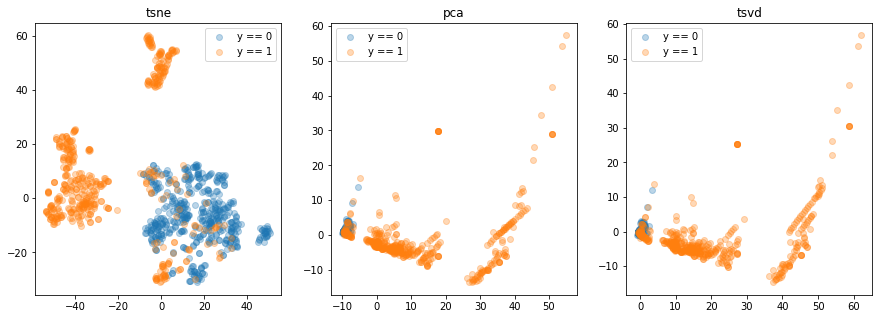

In [27]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
alpha = 0.3

ax[0].scatter(X_reduction_tsne[:,0][y == 0],X_reduction_tsne[:,1][y == 0],alpha = alpha)
ax[0].scatter(X_reduction_tsne[:,0][y == 1],X_reduction_tsne[:,1][y == 1],alpha = alpha)
ax[0].set_title("tsne")
ax[0].legend(["y == 0", "y == 1"])

ax[1].scatter(X_reduction_pca[:,0][y == 0],X_reduction_pca[:,1][y == 0],alpha = alpha)
ax[1].scatter(X_reduction_pca[:,0][y == 1],X_reduction_pca[:,1][y == 1],alpha = alpha)
ax[1].set_title("pca")
ax[1].legend(["y == 0", "y == 1"])

ax[2].scatter(X_reduction_tsvd[:,0][y == 0],X_reduction_tsvd[:,1][y == 0],alpha = alpha)
ax[2].scatter(X_reduction_tsvd[:,0][y == 1],X_reduction_tsvd[:,1][y == 1],alpha = alpha)
ax[2].set_title("tsvd")
ax[2].legend(["y == 0", "y == 1"])

plt.show()

사실 PCA는 Eigenvalue decomposition이고 SVD는 singular value decomposition 이라 큰 틀에서는 같은 작업이라고 할 수 있다. 그래서 둘의 클러스터링은 모양도 비슷하고 군집화도 잘 되지 않은 모습을 볼 수 있다. PCA도 훌륭한 차원 축소 방법이지만 이번 데이터에서는 t-SNE 로 봤을때 그룹이 훨씬 더 잘 나누어진 것을 확인했다. 원문에서 작성자는 데이터의 크기에 관한 설명을 하는데 이미 데이터공간에서 일정한 군집을 이룬 데이터를 임의로 뽑아와서 만든 subdata이므로 그때 PCA가 어려운 데이터라면 undersampling을 거친 후에도 PCA로 군집이 이루어지지않을 가능성이 있다. 이럴때는 tomek link undersampling 등을 적용해보면 더 나을 것이다.

# Classifiers with undersample

분류기는 정말 많은 종류가 있다. 여기서 어떤 분류기를 선택하여 사용할 것인지를 결정하는 방법으로는 accuracy나 F1 score등의 성능을 수치로 측정하여 보는 방법과 학습의 양상을 시각화한 ROC, PR, Learning curve를 비교하는 것이 있다. 특히 learning curve는 아래와 같은 특징을 가진다.

- training score와 cross validation score 간의 간격이 넓으면 넓을 수록 overfitting 되고 있음을 나타낸다.
- 이 간격이 좁으면서 둘 다 낮은 점수를 보인다면 그 모델은 underfitting 되고 있다.
- 따라서 training score와 cross validaion score 모두 높으면서 간격이 좁은 모델을 선정하는 것이 좋다.

데이터는 모두 준비가 되었으니 이제 모델을 학습하고 평가해보자.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
classifiers={
    "LogisticRegression"      : LogisticRegression(),
    "KNeighborsClassifier"    : KNeighborsClassifier(),
    "SupportVectorClassifier" : SVC(),
    "DecisionTreeClassifier"  : DecisionTreeClassifier(),
    "RandomForestClassifier"  : RandomForestClassifier(),
    "MLPClassifier"           : MLPClassifier(hidden_layer_sizes=(128,64),max_iter=2000,)
}

모델들을 불러와서 한꺼번에 다루기 편하도록 딕셔너리에 묶어줬다. 값들은 모두 기본값으로 설정이 되어있으며 cross validation으로 점검하면서 모델의 성능을 비교한다.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size= 0.2)
# X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size= 0.2) 이 부분을 cross_val_score로 대체할 수 있다.

지금은 테스트 데이터가 없는 상황이므로 임의로 테스트데이터를 나누고 정답은 모른다고 가정하자. 그러면 벨리데이션을 따로 나누어줘야한다. 하지만 sklearn에서 제공하는 cross_val_score 를 이용하면 학습데이터 내에서 val 데이터를 자동으로 뽑아서 학습하고 스코어링 하는 과정을 여러번 연속으로 할 수 있다. 그런 경우 우리가 사용하는 데이터로부터 평균적으로 얼마 정도의 학습능력을 가질 수 있는지 빠르게 판단할 수 있다.

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
for name, model in classifiers.items():
    # model.fit(X_tr,y_tr) 이걸 안해도 된다.
    cv_score = cross_val_score(
        estimator = model,
        X = X_tr,
        y = y_tr.astype(int),
        cv = 10,
        scoring = 'f1',
    )
    template = "{0:} score mean::: {1:2.2f} %"
    print(template.format(name, cv_score.mean() * 100))

LogisticRegression score mean::: 94.35 %
KNeighborsClassifier score mean::: 92.63 %
SupportVectorClassifier score mean::: 93.19 %
DecisionTreeClassifier score mean::: 90.53 %
RandomForestClassifier score mean::: 94.30 %
MLPClassifier score mean::: 94.89 %


이것으로 이 데이터에 대해서 가장 높은 F1 score 성능을 보이는 모델은 MLPClassifier 임을 알게되었다. 이제 이 모델을 훈련하여서 점수들을 얻고 ROC 커브를 그려보자.

In [34]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

In [35]:
NN = MLPClassifier(hidden_layer_sizes=(128,64),max_iter=2000,)
NN.fit(X, y)

prediction = NN.predict(X_te)

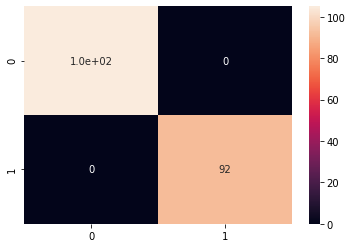

In [36]:
conf_m = confusion_matrix(y_te,prediction)
sns.heatmap(conf_m, annot=True)
plt.show()

아니.. 좀 분석도 하고 그럴라했더니만 다 맞춰버렸다.. 

In [37]:
print(y_te.shape,prediction.shape)


(197,) (197,)


이걸 보면 MLP 같은 경우에는 0과 1로 만들어주는 예를 들면 argmax 같은 후처리가 들어간 것을 볼 수 있다. 이런 경우에는 threshold를 찾을 수 있는 경우의 수가 양 끝값을 제외하면 1개로 족하다. 0이나 1이 아닌 어떤 값도 같은 수의 fpr과 tpr을 주기 때문이다. 이런 경우 매우 각진 ROC 커브가 나온다.

In [38]:
fpr, tpr, thr = roc_curve(
    y_te,
    prediction
)
print(fpr.shape, tpr.shape, thr.shape)

(3,) (3,) (3,)


In [39]:
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass fpr=[0. 0. 1.], tpr=[0. 1. 1.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


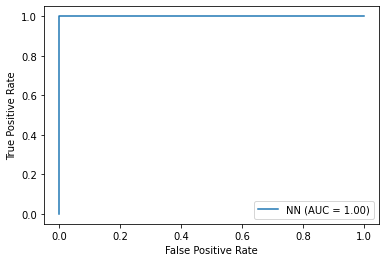

In [40]:
RocCurveDisplay(
    fpr,
    tpr,
    roc_auc = roc_auc,
    estimator_name = "NN"
).plot()
plt.show()

그러면 Regresser는 어떨까. prediction이 연속된 값으로 나온다면 이 경우에는 좀 더 연속적인 threshold 가 발생할 것이고 그러면 좀 더 커브가 부드러워질 것이라고 예상할 수 있다.

In [44]:
LogReg = LogisticRegression()
LogReg.fit(X_tr, y_tr)

prediction = LogReg.predict_proba(X_te)

In [51]:
conf_m = confusion_matrix(y_te,prediction)
sns.heatmap(conf_m,annot=True)
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

(21,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass fpr=[0.         0.         0.         0.         0.01904762 0.01904762
 0.04761905 0.04761905 0.14285714 0.14285714 0.15238095 0.15238095
 0.18095238 0.18095238 0.38095238 0.38095238 0.43809524 0.43809524
 0.9047619  0.9047619  1.        ], tpr=[0.         0.26086957 0.29347826 0.89130435 0.89130435 0.91304348
 0.91304348 0.92391304 0.92391304 0.93478261 0.93478261 0.94565217
 0.94565217 0.9673913  0.9673913  0.97826087 0.97826087 0.98913043
 0.98913043 1.         1.        ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


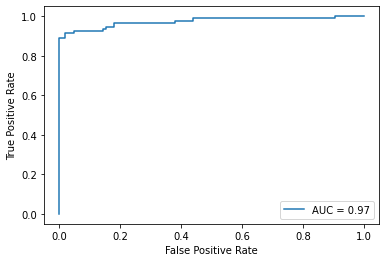

In [50]:
fpr, tpr, thr = roc_curve(y_te,prediction[:,1])
print(fpr.shape)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(
    fpr,
    tpr,
    roc_auc = roc_auc
).plot()
plt.show()